<a href="https://colab.research.google.com/github/Gabomatius/MD_Anime/blob/An%C3%A1lisis-descriptivo/An%C3%A1lisis_Descriptivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import trim_mean
from numpy import mean, absolute
import re
import math
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.decomposition import PCA
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

data=pd.read_csv("/content/drive/Shareddrives/Mineria de datos/anime.csv")
data_1=pd.read_csv("/content/drive/Shareddrives/Mineria de datos/Row_data.csv", sep = ";")
data_2=pd.read_csv("/content/drive/Shareddrives/Mineria de datos/Col_data.csv", sep = ";")

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (69,70) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# **Análisis Descriptivo**
Ya con las bases de datos limpias y con el tipo de variables correcto, procedemos a realizar el análisis descriptivo. Para esto se realizarán las medidas desriptivas de cada una de las variables numéricas, sus gráficos descriptivos. Además se estandarizarán algunas variables para identificar posibles datos atípicos, y se harán algunas discretizaciones también. Finalmente procederemos a realizar un PCA para aplicar algunas de las técnicas aprendidas en clase.

In [ ]:
Cuantitativas = data_2.loc[:,(data_2.dtypes == "float64")]
pd.DataFrame(np.array(Cuantitativas.describe()).T,
             columns = Cuantitativas.describe().index,
             index = Cuantitativas.describe().columns)


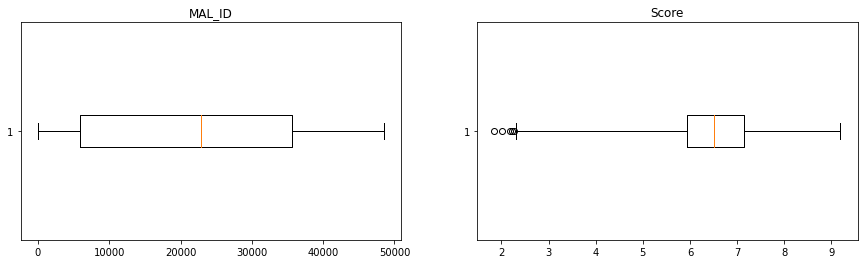

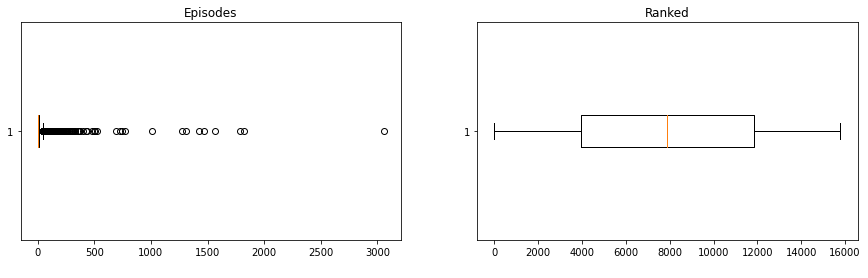

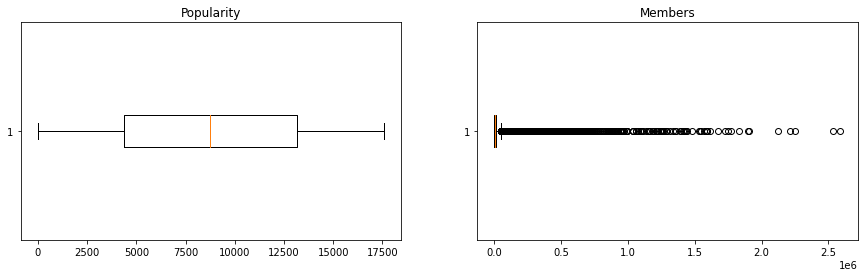

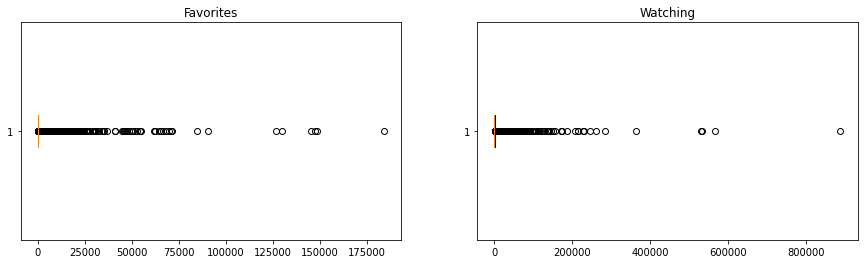

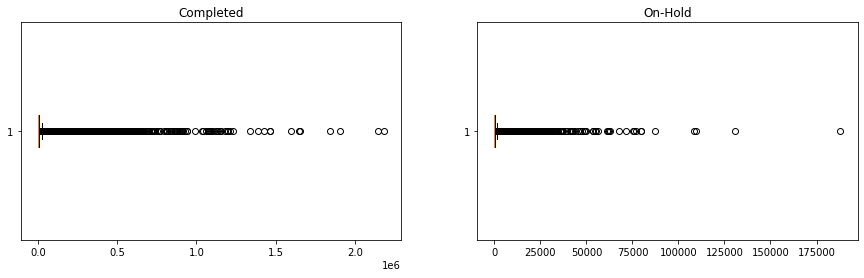

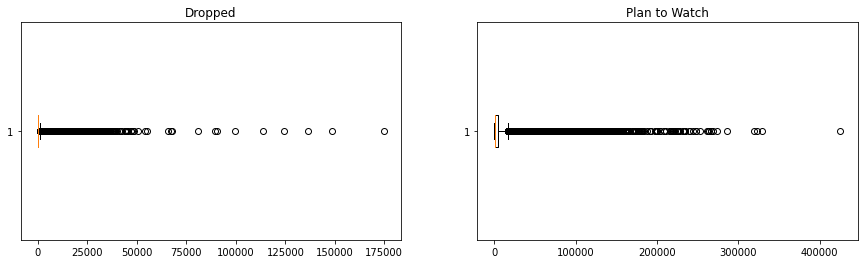

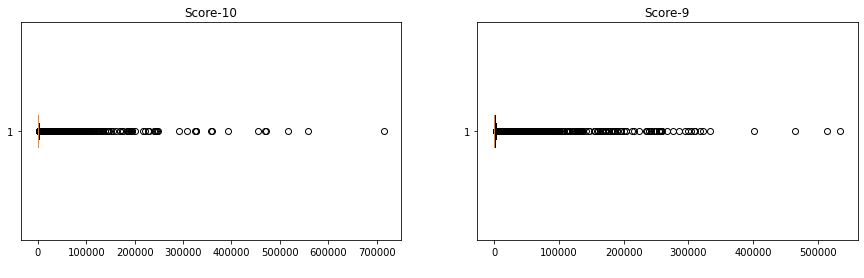

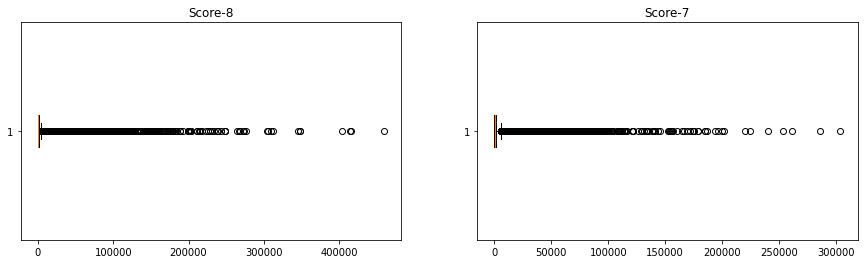

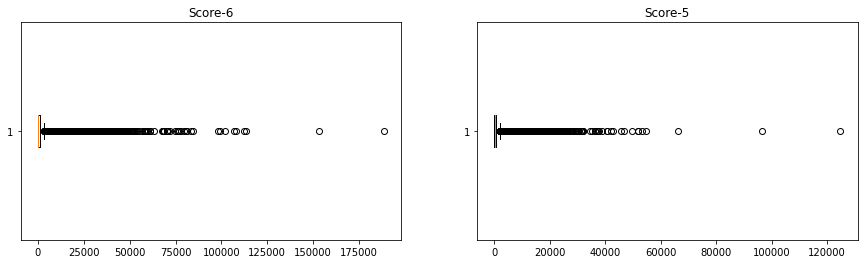

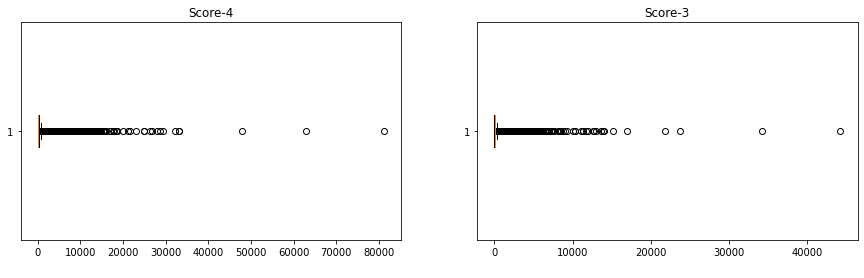

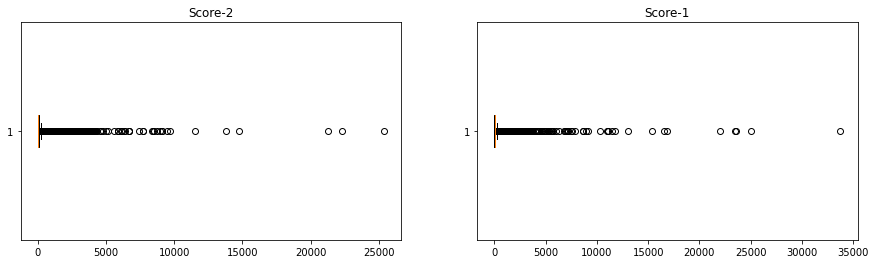

In [ ]:
for i in range(int((len(Cuantitativas.columns)-1)/2)):
  fig, (ax1, ax2) = plt.subplots(1,2)
  fig.set_figheight(4)
  fig.set_figwidth(15)
  ax1.boxplot(Cuantitativas[Cuantitativas.columns[i*2]][~Cuantitativas[Cuantitativas.columns[i*2]].isna()],
              vert =False, whis = 3)
  ax1.set_title(Cuantitativas.columns[i*2])
  ax1.set(xlabel = " ")
  ax2.boxplot(Cuantitativas[Cuantitativas.columns[i*2+1]][~Cuantitativas[Cuantitativas.columns[i*2+1]].isna()],
              vert =False, whis = 3)
  ax2.set_title(Cuantitativas.columns[i*2+1])
  ax2.set(xlabel = " ")

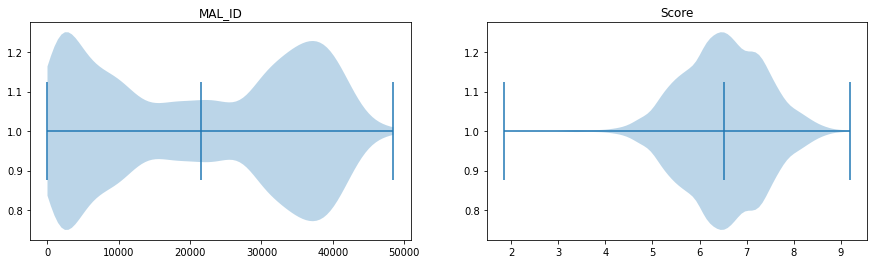

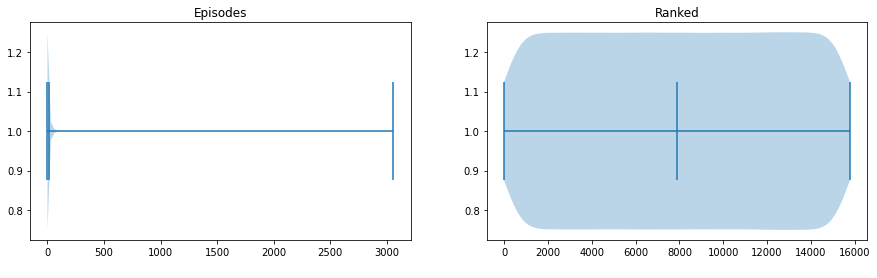

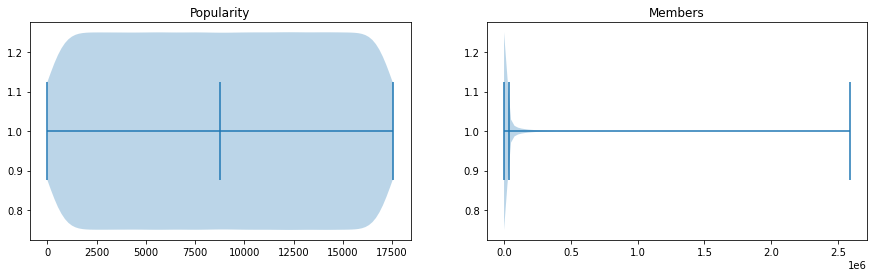

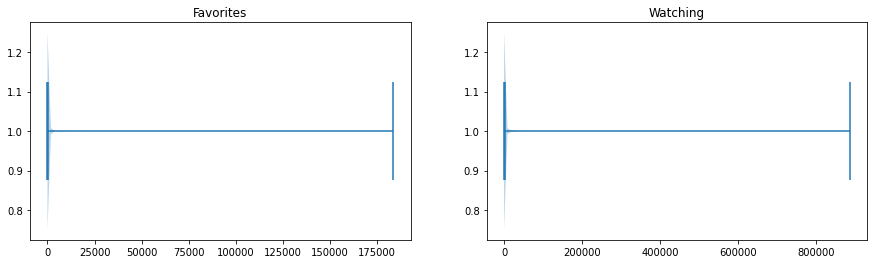

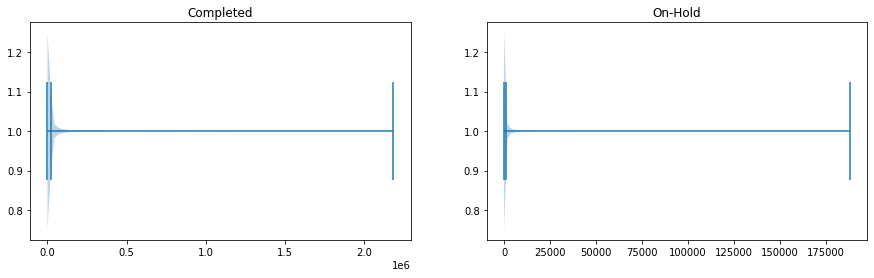

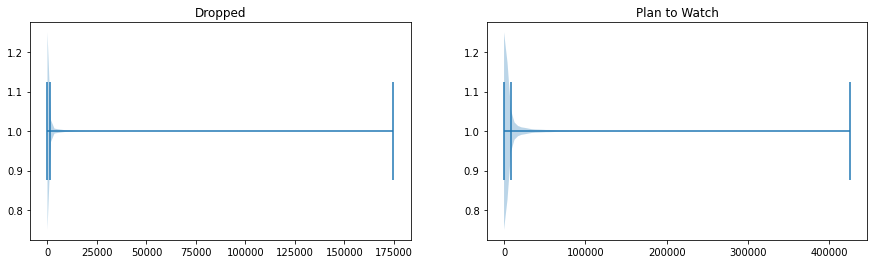

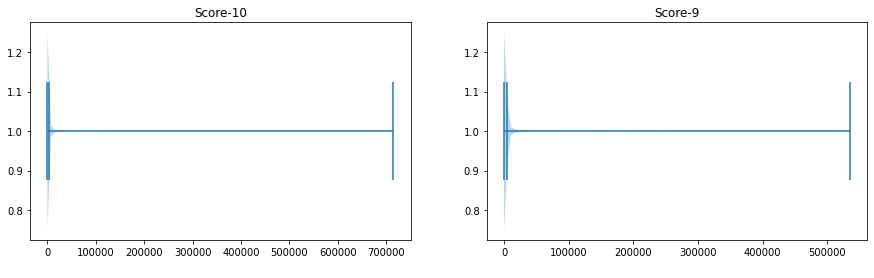

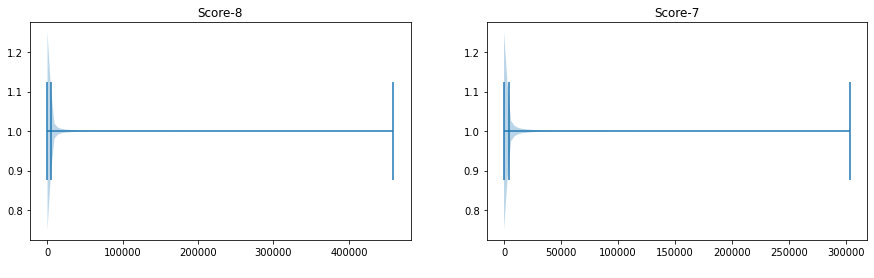

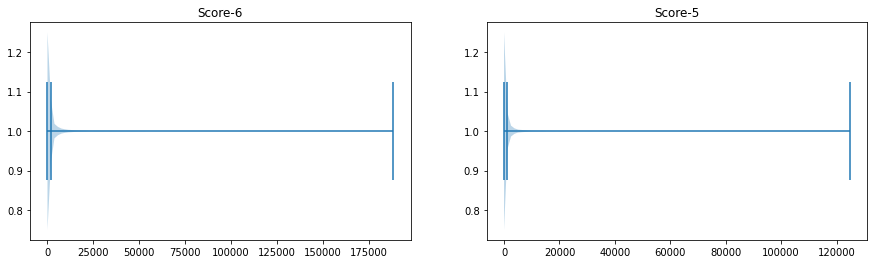

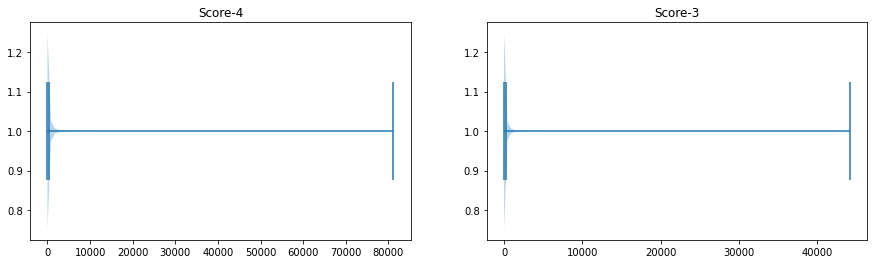

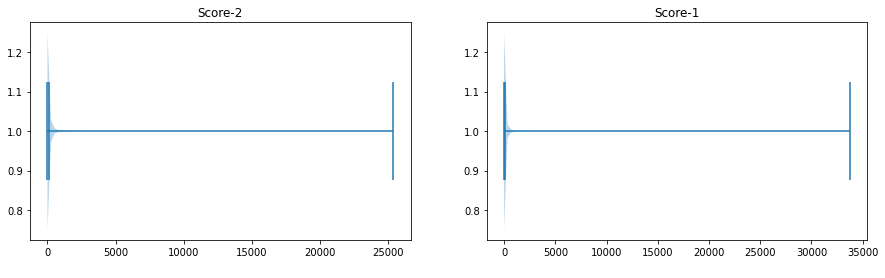

In [ ]:
for i in range(int((len(Cuantitativas.columns)-1)/2)):
  fig, (ax1, ax2) = plt.subplots(1,2)
  fig.set_figheight(4)
  fig.set_figwidth(15)
  ax1.violinplot(Cuantitativas[Cuantitativas.columns[i*2]][~Cuantitativas[Cuantitativas.columns[i*2]].isna()],
              vert =False, showmeans = True)
  ax1.set_title(Cuantitativas.columns[i*2])
  ax1.set(xlabel = " ")
  ax2.violinplot(Cuantitativas[Cuantitativas.columns[i*2+1]][~Cuantitativas[Cuantitativas.columns[i*2+1]].isna()],
              vert =False, showmeans =True)
  ax2.set_title(Cuantitativas.columns[i*2+1])
  ax2.set(xlabel = " ")

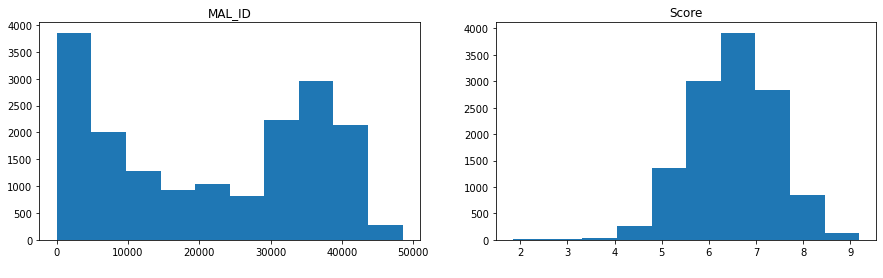

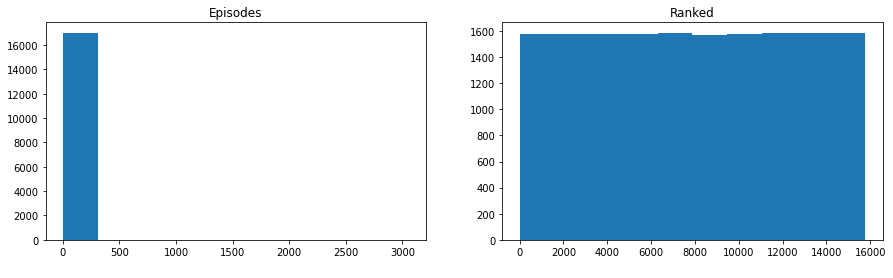

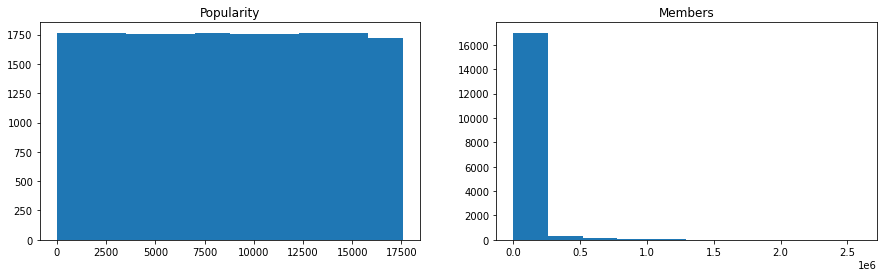

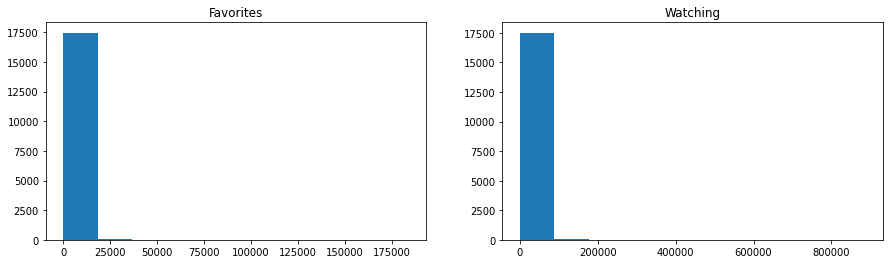

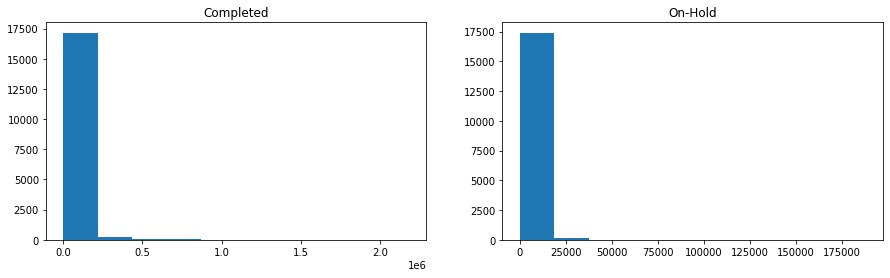

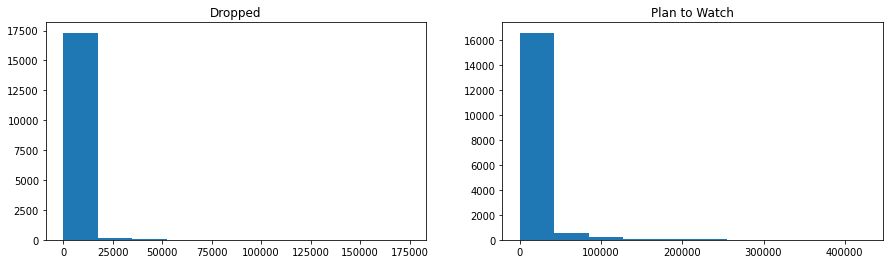

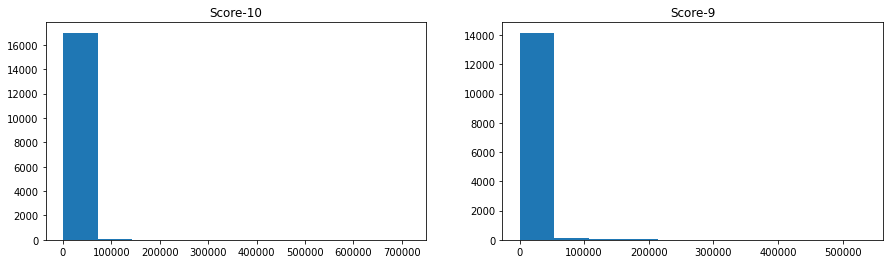

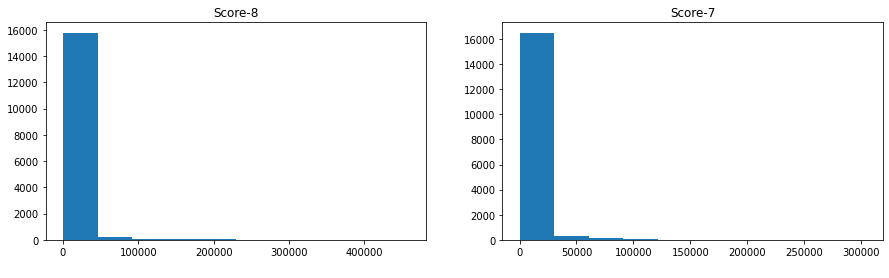

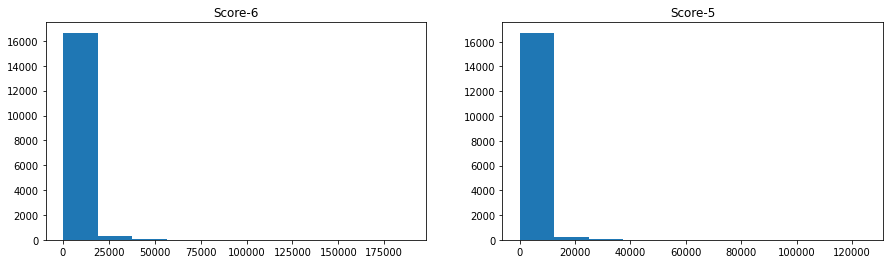

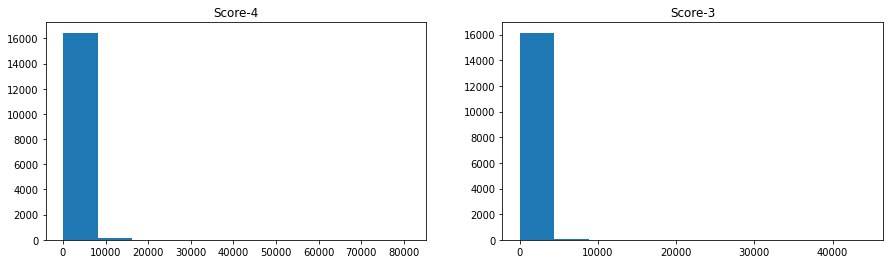

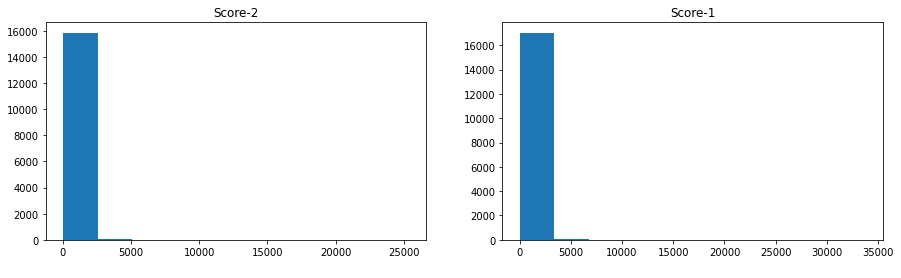

In [ ]:
for i in range(int((len(Cuantitativas.columns)-1)/2)):
  fig, (ax1, ax2) = plt.subplots(1,2)
  fig.set_figheight(4)
  fig.set_figwidth(15)
  ax1.hist(Cuantitativas[Cuantitativas.columns[i*2]][~Cuantitativas[Cuantitativas.columns[i*2]].isna()],
           bins = 10, histtype = 'stepfilled')
  ax1.set_title(Cuantitativas.columns[i*2])
  ax1.set(xlabel = " ")
  ax2.hist(Cuantitativas[Cuantitativas.columns[i*2+1]][~Cuantitativas[Cuantitativas.columns[i*2+1]].isna()],
           bins = 10, histtype = 'stepfilled')
  ax2.set_title(Cuantitativas.columns[i*2+1])
  ax2.set(xlabel = " ")

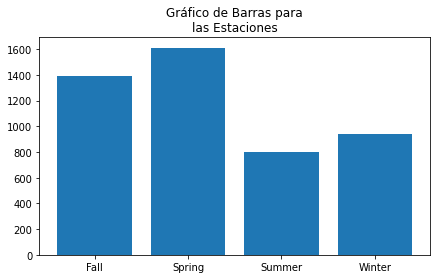

In [ ]:
Season = data_2[["Premiered Season"]][~data_2["Premiered Season"].isna()].groupby("Premiered Season").size()
fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(7)
ax.bar(x = np.array(Season.keys()), height = np.array(Season.array))
ax.set_title("Gráfico de Barras para\nlas Estaciones")
plt.show()

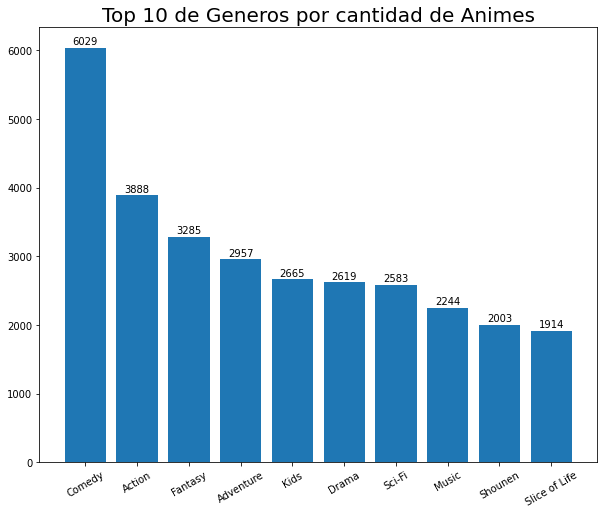

In [ ]:
Generos = data_1[["MAL_ID","Genres"]].drop_duplicates().groupby(["Genres"]).size().to_frame("Cantidad").sort_values(by = "Cantidad", ascending = False).head(10).reset_index()
fig = plt.figure(figsize = (10,8))
plt.bar("Genres", "Cantidad", data = Generos)
plt.xticks(rotation = 30)
plt.title("Top 10 de Generos por cantidad de Animes", size = 20)

for i in range(Generos.shape[0]):
  plt.text(Generos["Genres"][i], Generos["Cantidad"][i] + 50, Generos["Cantidad"][i], ha = "center")

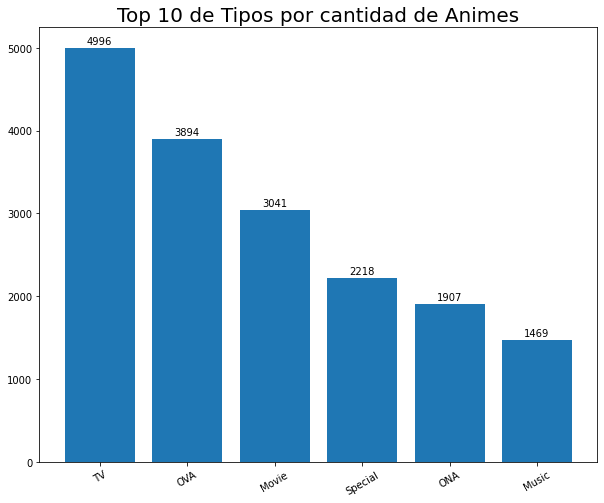

In [ ]:
Type = data_1[["MAL_ID","Type"]].drop_duplicates().groupby(["Type"]).size().to_frame("Cantidad").sort_values(by = "Cantidad", ascending = False).head(10).reset_index()
fig = plt.figure(figsize = (10,8))
plt.bar("Type", "Cantidad", data = Type)
plt.xticks(rotation = 30)
plt.title("Top 10 de Tipos por cantidad de Animes", size = 20)

for i in range(Type.shape[0]):
  plt.text(Type["Type"][i], Type["Cantidad"][i] + 50, Type["Cantidad"][i], ha = "center")

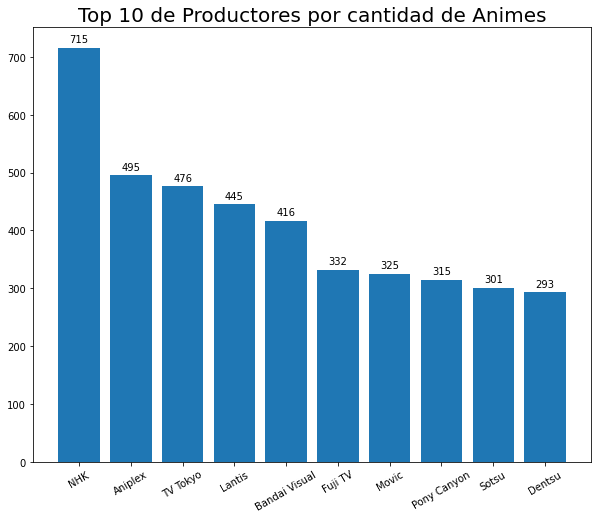

In [ ]:
Producers = data_1[["MAL_ID","Producers"]].drop_duplicates().groupby(["Producers"]).size().to_frame("Cantidad").sort_values(by = "Cantidad", ascending = False).head(10).reset_index()
fig = plt.figure(figsize = (10,8))
plt.bar("Producers", "Cantidad", data = Producers)
plt.xticks(rotation = 30)
plt.title("Top 10 de Productores por cantidad de Animes", size = 20)

for i in range(Producers.shape[0]):
  plt.text(Producers["Producers"][i], Producers["Cantidad"][i] + 10, Producers["Cantidad"][i], ha = "center")

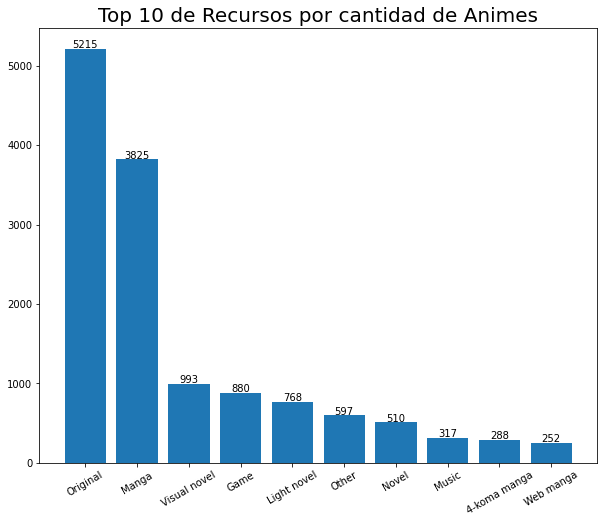

In [ ]:
Source = data_1[["MAL_ID","Source"]].drop_duplicates().groupby(["Source"]).size().to_frame("Cantidad").sort_values(by = "Cantidad", ascending = False).head(10).reset_index()
fig = plt.figure(figsize = (10,8))
plt.bar("Source", "Cantidad", data = Source)
plt.xticks(rotation = 30)
plt.title("Top 10 de Recursos por cantidad de Animes", size = 20)

for i in range(Source.shape[0]):
  plt.text(Source["Source"][i], Source["Cantidad"][i] + 10, Source["Cantidad"][i], ha = "center")

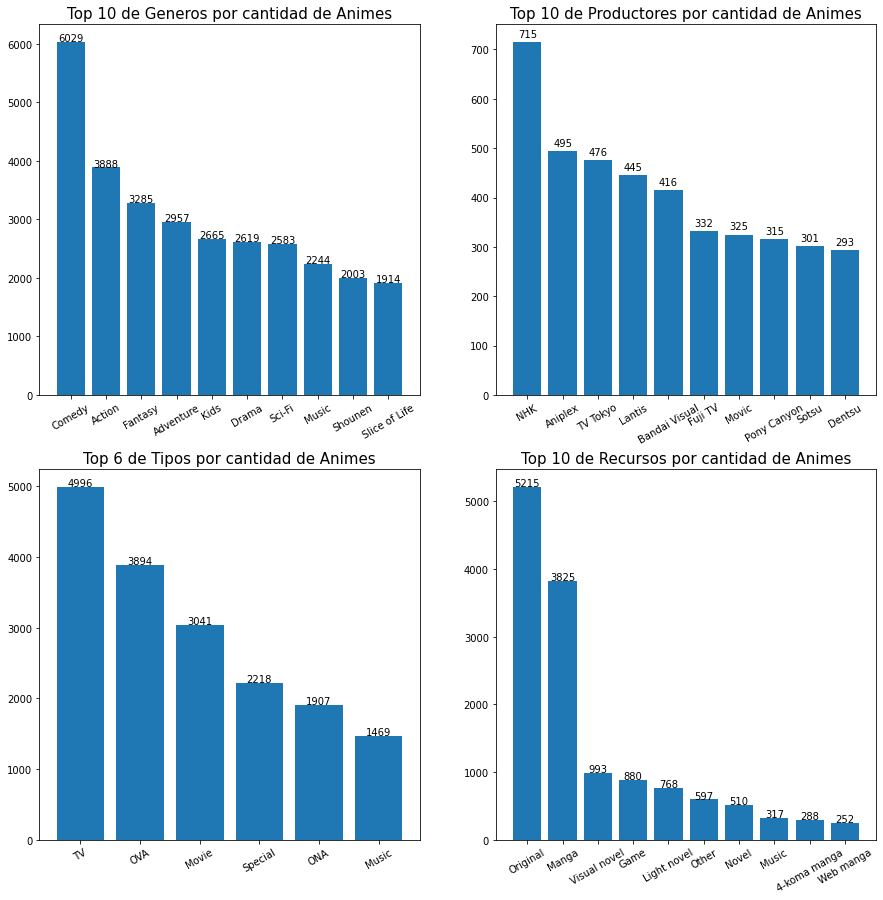

In [ ]:
fig, ax1 = plt.subplots(nrows=2, ncols = 2, )
fig.set_figheight(15)
fig.set_figwidth(15)
ax1[0,0].bar("Genres", "Cantidad", data = Generos)
ax1[0,0].set_xticklabels(labels = Generos["Genres"],rotation = 30)
ax1[0,0].set_title("Top 10 de Generos por cantidad de Animes", size = 15)


for i in range(Generos.shape[0]):
  ax1[0,0].text(Generos["Genres"][i], Generos["Cantidad"][i] + 10, Generos["Cantidad"][i], ha = "center")

fig.set_figheight(15)
fig.set_figwidth(15)
ax1[0,1].bar("Producers", "Cantidad", data = Producers)
ax1[0,1].set_xticklabels(labels = Producers["Producers"],rotation = 30)
ax1[0,1].set_title("Top {} de Productores por cantidad de Animes".format(Producers.shape[0]), size = 15)


for i in range(Producers.shape[0]):
  ax1[0,1].text(Producers["Producers"][i], Producers["Cantidad"][i] + 10, Producers["Cantidad"][i], ha = "center")

fig.set_figheight(15)
fig.set_figwidth(15)
ax1[1,0].bar("Type", "Cantidad", data = Type)
ax1[1,0].set_xticklabels(labels = Type["Type"],rotation = 30)
ax1[1,0].set_title("Top {} de Tipos por cantidad de Animes".format(Type.shape[0]), size = 15)


for i in range(Type.shape[0]):
  ax1[1,0].text(Type["Type"][i], Type["Cantidad"][i] + 10, Type["Cantidad"][i], ha = "center")

fig.set_figheight(15)
fig.set_figwidth(15)
ax1[1,1].bar("Source", "Cantidad", data = Source)
ax1[1,1].set_xticklabels(labels = Source["Source"],rotation = 30)
ax1[1,1].set_title("Top {} de Recursos por cantidad de Animes".format(Source.shape[0]), size = 15)


for i in range(Source.shape[0]):
  ax1[1,1].text(Source["Source"][i], Source["Cantidad"][i] + 10, Source["Cantidad"][i], ha = "center")

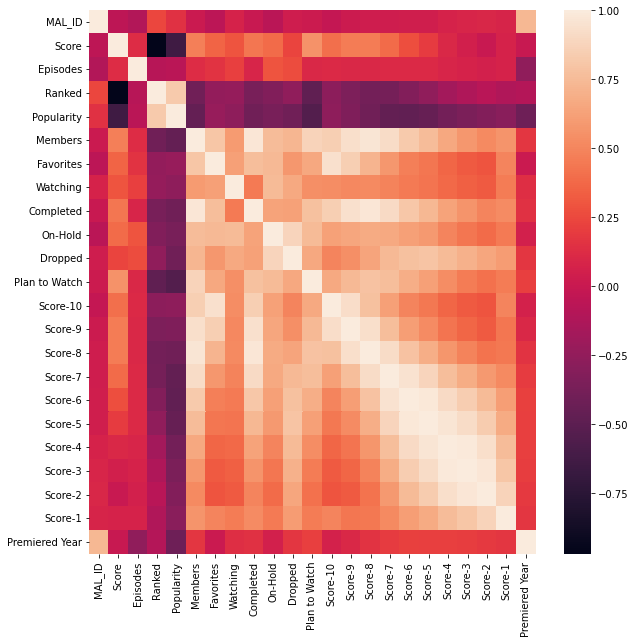

In [ ]:
fig = plt.figure(figsize = (10,10))
sns.heatmap(data_1.corr())
plt.show()

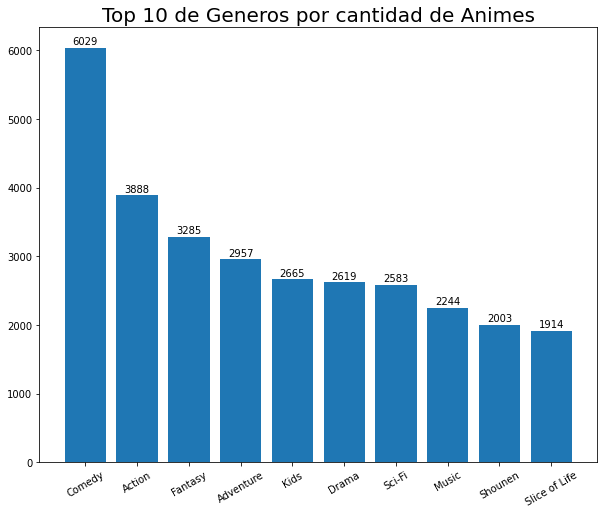

In [ ]:
Generos = data_1[["MAL_ID","Genres"]].drop_duplicates().groupby(["Genres"]).size().to_frame("Cantidad").sort_values(by = "Cantidad", ascending = False).head(10).reset_index()
fig = plt.figure(figsize = (10,8))
plt.bar("Genres", "Cantidad", data = Generos)
plt.xticks(rotation = 30)
plt.title("Top 10 de Generos por cantidad de Animes", size = 20)

for i in range(Generos.shape[0]):
  plt.text(Generos["Genres"][i], Generos["Cantidad"][i] + 50, Generos["Cantidad"][i], ha = "center")

## **Outliers**
Ahora utilizaremos la estandarización para identificar datos atípicos. Lo haremos principalmente basados en la variable respuesta que es **Score**.

In [ ]:
Score_Estandarizado = ((data[["Score"]]-np.mean(data[["Score"]]))/np.std(data[["Score"]]))[~data["Score"].isna()]
Indices = Score_Estandarizado.index[(np.abs(Score_Estandarizado)>=3)["Score"]]
data_2.loc[Indices,:][data_2.columns[0:20]]

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3579: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


,MAL_ID,Score,Type,Episodes,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7


Se encuentra que la gran mayoría de datos atípicos, son principalmente animes que tienen muy pocos capítulos y en cuanto a su popularidad, tiende a tener puestos muy bajos.

## **Valores Perdidos**

In [ ]:
scores = []
for i in range(len(data_2.columns)):
  if (len(re.findall("Score-", data_2.columns[i]))):
    scores.append(data_2.columns[i])

data_2[data_2["Score"].isna()][scores]

,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
1404,8.0,5.0,6.0,20.0,28.0,31.0,6.0,6.0,2.0,10.0
1504,7.0,2.0,6.0,13.0,17.0,22.0,15.0,12.0,7.0,10.0
1578,6.0,4.0,23.0,28.0,18.0,17.0,1.0,3.0,NaN,8.0
1699,3.0,1.0,2.0,9.0,5.0,9.0,3.0,1.0,2.0,3.0
1893,10.0,3.0,14.0,26.0,27.0,19.0,10.0,3.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...
17557,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
17558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17559,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Indices_1 = data_2[["Score"]][data_2["Score"].isna()].index
my_imputer = SimpleImputer(strategy = 'most_frequent')
Imputados = pd.DataFrame(my_imputer.fit_transform(data_2[data_2["Score"].isna()][scores]), columns = scores, index = Indices_1)
Estimado = []
for i in Indices_1:
  Estimado.append(np.array(Imputados.loc[i,:]).dot(np.array(list(range(1,11))))/sum(Imputados.loc[i,:]))
Imputados["Score"] = Estimado
for i in Imputados.columns:
  data_2.loc[Indices_1,i] = Imputados.loc[Indices_1,i]

data_2.loc[Indices_1,:]
data_2.to_csv("/content/drive/Shareddrives/Mineria de datos/Col_data_Imputed.csv", sep = ";", index = False)

## **Discretización y PCA**

Ahora realizaremos una discretización de la variable **Score** y haremos un **PCA** para los **Scores**.

In [ ]:
discretizacion = KBinsDiscretizer(n_bins = 5,strategy = "kmeans", encode = "ordinal")
Binarizadas = discretizacion.fit_transform(np.array(data_2["Score"]).reshape(len(data_2["Score"]),1))
data_2["Score-Discretizado"] = Binarizadas

data_2["Score-Discretizado"] = data_2["Score-Discretizado"].astype(str)
Variables_PCA =[]
for i in data_2.columns:
  if (len(re.findall("Score-",i))):
    Variables_PCA.append(i)

X = data_2[Variables_PCA].dropna()[Variables_PCA[0:(len(Variables_PCA)-1)]]
y = data_2[Variables_PCA].dropna()[Variables_PCA[-1]]
pca = PCA(n_components = 2)
ajustado = pca.fit_transform(X)

In [ ]:
colores = []
for i in y:
  if (i == '0.0'):
    colores.append("black")
  elif (i == '1.0'):
    colores.append("red")
  elif (i == '2.0'):
    colores.append("blue")
  elif (i == '2.0'):
    colores.append("green")
  else:
    colores.append("yellow")

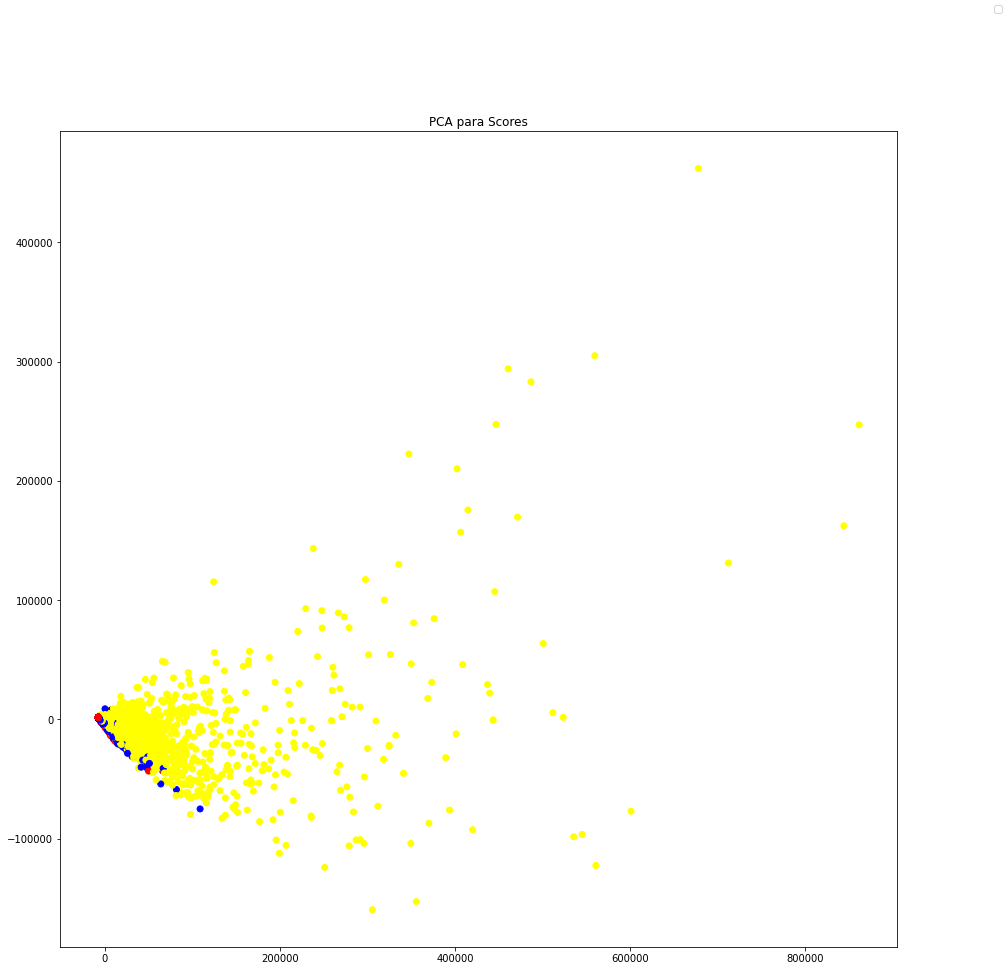

In [ ]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.scatter(ajustado.T[0], ajustado.T[1], c = colores)
plt.title("PCA para Scores")
fig.legend()
plt.show()

In [ ]:
y[0]

'4.0'

In [ ]:
pca.fit(X).explained_variance_ratio_

array([0.88493274, 0.09187743])

In [ ]:
sum(pca.fit(X).explained_variance_ratio_)

0.9768101770972752

Se realizó un analisis de componentes principales para las variables Score-1 al Score-9, y los colores se definieron a partir de la discretización de la la variable Score, utilizando 4 intervalos por el medio de kmeans. Con las dos primeras componentes principales se alcanza a explicar un 97.6% de la variabilidad total.